In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [2]:
!pip install yfinance

  Using cached yfinance-0.2.18-py2.py3-none-any.whl (60 kB)
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)


In [4]:
start = '2013-01-01'
end = '2023-04-28'
df = yf.download('AAPL',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.837114,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.624598,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.161528,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.066460,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.109699,458707200


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-21,165.050003,166.449997,164.490005,165.020004,165.020004,58311900
2023-04-24,165.000000,165.600006,163.889999,165.330002,165.330002,41949600
2023-04-25,165.190002,166.309998,163.729996,163.770004,163.770004,48714100
2023-04-26,163.059998,165.279999,162.800003,163.759995,163.759995,45498800
2023-04-27,165.190002,168.559998,165.190002,168.410004,168.410004,64902300


In [6]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.837114,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.624598,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.161528,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.066460,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.109699,458707200


In [7]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200


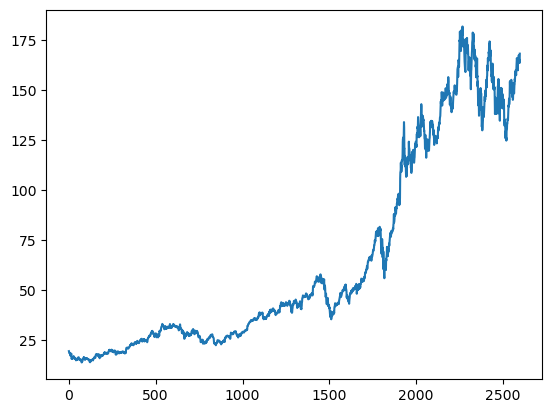

In [8]:
plt.plot(df.Close)

In [9]:
df

,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200
...,...,...,...,...,...
2593,165.050003,166.449997,164.490005,165.020004,58311900
2594,165.000000,165.600006,163.889999,165.330002,41949600
2595,165.190002,166.309998,163.729996,163.770004,48714100
2596,163.059998,165.279999,162.800003,163.759995,45498800


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2593    147.8192
2594    148.0303
2595    148.2563
2596    148.4136
2597    148.6146
Name: Close, Length: 2598, dtype: float64

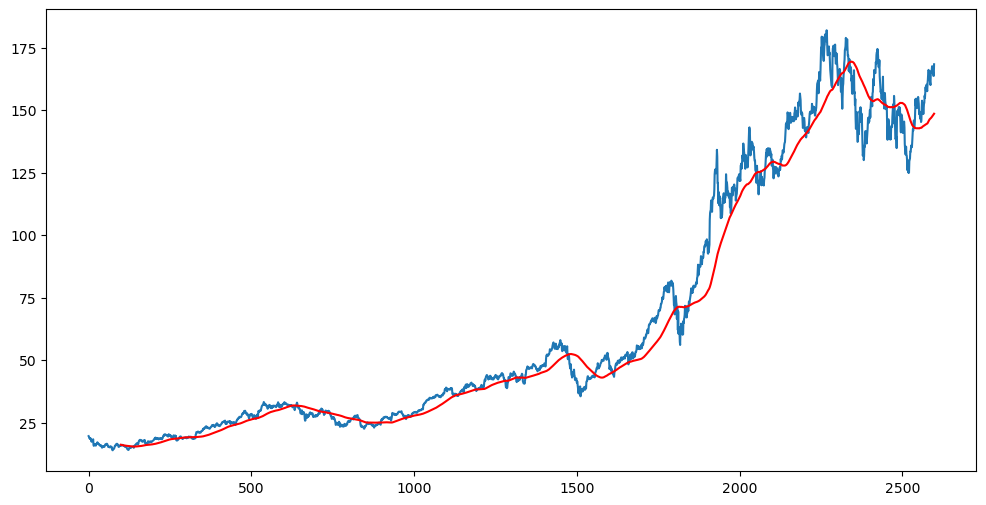

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2593    150.38955
2594    150.48445
2595    150.56810
2596    150.66255
2597    150.77530
Name: Close, Length: 2598, dtype: float64

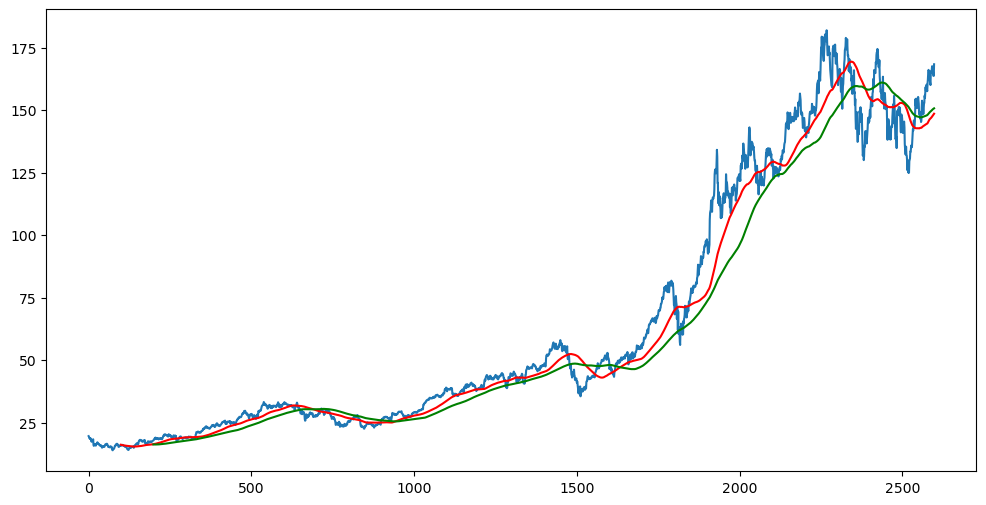

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')


In [14]:
df.shape


(2598, 5)

In [15]:
#split data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])


print(data_training.shape)
print(data_testing.shape)

(1818, 1)
(780, 1)


In [16]:
data_training.head()

,Close
0,19.608213
1,19.360714
2,18.821428
3,18.710714
4,18.761070


In [17]:
data_testing.head()

,Close
1818,61.720001
1819,61.380001
1820,64.610001
1821,61.935001
1822,63.702499


In [18]:
data_testing.tail()

,Close
2593,165.020004
2594,165.330002
2595,163.770004
2596,163.759995
2597,168.410004


In [19]:
#scaling data 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.08342674],
       [0.07977913],
       [0.07183122],
       ...,
       [0.69632655],
       [0.63907003],
       [0.62112666]])

In [21]:
data_training_array.shape

(1818, 1)

In [22]:
#divide data in two
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])


x_train, y_train = np.array(x_train), np.array(y_train)


In [23]:
x_train.shape

(1718, 100, 1)

In [24]:
#ML model

In [25]:
import tensorflow as tf
from tensorflow. keras.layers import Dense,Dropout, LSTM
from tensorflow.keras.models import Sequential

In [26]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [28]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
54/54 [==============================] - 29s 341ms/step - loss: 0.0320
Epoch 2/50
54/54 [==============================] - 19s 346ms/step - loss: 0.0063
Epoch 3/50
54/54 [==============================] - 20s 374ms/step - loss: 0.0044
Epoch 4/50
54/54 [==============================] - 20s 368ms/step - loss: 0.0044
Epoch 5/50
54/54 [==============================] - 20s 374ms/step - loss: 0.0046
Epoch 6/50
54/54 [==============================] - 18s 339ms/step - loss: 0.0039
Epoch 7/50
54/54 [==============================] - 18s 332ms/step - loss: 0.0039
Epoch 8/50
54/54 [==============================] - 18s 337ms/step - loss: 0.0038
Epoch 9/50
54/54 [==============================] - 18s 334ms/step - loss: 0.0034
Epoch 10/50
54/54 [==============================] - 18s 334ms/step - loss: 0.0036
Epoch 11/50
54/54 [==============================] - 18s 336ms/step - loss: 0.0030
Epoch 12/50
54/54 [==============================] - 18s 334ms/step - loss: 0.0031
Epoch 13/50
5

In [29]:
model.save('keras_model.h51')

INFO:tensorflow:Assets written to: keras_model.h51\assets


In [30]:
data_testing.head()

,Close
1818,61.720001
1819,61.380001
1820,64.610001
1821,61.935001
1822,63.702499


In [31]:
data_training.tail()

,Close
1813,63.215000
1814,61.667500
1815,61.195000
1816,57.310001
1817,56.092499


In [32]:
past_100_days = data_training.tail(100)

In [33]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [34]:
final_df.head()

,Close
0,60.822498
1,60.814999
2,62.189999
3,63.955002
4,64.375000


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.03756428],
       [0.03750472],
       [0.04842456],
       [0.0624417 ],
       [0.06577721],
       [0.06504261],
       [0.06526098],
       [0.06960907],
       [0.07101876],
       [0.07510874],
       [0.07463219],
       [0.07961564],
       [0.07598233],
       [0.08217685],
       [0.08483732],
       [0.08322913],
       [0.07707429],
       [0.0747315 ],
       [0.07427483],
       [0.08338794],
       [0.07925827],
       [0.08630652],
       [0.08513512],
       [0.07900016],
       [0.06964881],
       [0.0741954 ],
       [0.08181943],
       [0.09200468],
       [0.08447996],
       [0.08757722],
       [0.0921238 ],
       [0.09349375],
       [0.10081998],
       [0.11017133],
       [0.11126335],
       [0.10993309],
       [0.110489  ],
       [0.10933748],
       [0.11839102],
       [0.11892707],
       [0.1301249 ],
       [0.12990648],
       [0.13332141],
       [0.13755038],
       [0.15085277],
       [0.14505529],
       [0.14976075],
       [0.146

In [36]:
input_data.shape

(880, 1)

In [37]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [38]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(780, 100, 1)
(780,)


In [39]:
# Making Predictions

y_predicted = model.predict(x_test)

25/25 [==============================] - 4s 98ms/step


In [40]:
y_predicted.shape

(780, 1)

In [41]:
y_test

array([0.04469198, 0.0419918 , 0.06764351, 0.04639945, 0.0604364 ,
       0.05940397, 0.03283898, 0.04082037, 0.03383169, 0.07564478,
       0.06960907, 0.08279233, 0.08660432, 0.09704768, 0.12444655,
       0.11924474, 0.12373183, 0.11600849, 0.10435404, 0.08735879,
       0.10270616, 0.10058174, 0.11634604, 0.11674315, 0.10762998,
       0.12579669, 0.13784818, 0.12845715, 0.13657754, 0.14531341,
       0.15140868, 0.15758333, 0.17027024, 0.17995914, 0.17281159,
       0.16534636, 0.16909885, 0.16546548, 0.17985983, 0.1762464 ,
       0.18833764, 0.18361231, 0.1876626 , 0.18337407, 0.18611391,
       0.1863919 , 0.18577642, 0.19353945, 0.19649772, 0.20003177,
       0.1944726 , 0.21269881, 0.21659023, 0.23749677, 0.25506781,
       0.22143467, 0.2271924 , 0.23551135, 0.25355887, 0.25258603,
       0.25286402, 0.24887329, 0.26703994, 0.28224831, 0.2694026 ,
       0.27889294, 0.25663632, 0.27281754, 0.2788135 , 0.27744355,
       0.27744355, 0.29678165, 0.29447855, 0.31171204, 0.31496

In [42]:
y_predicted

array([[0.14739373],
       [0.14181814],
       [0.1362518 ],
       [0.1310174 ],
       [0.12627499],
       [0.12216832],
       [0.1187346 ],
       [0.11585145],
       [0.11340781],
       [0.11124769],
       [0.10945827],
       [0.10810862],
       [0.10728085],
       [0.10702562],
       [0.10738172],
       [0.10844049],
       [0.11019792],
       [0.11261815],
       [0.1155902 ],
       [0.11892521],
       [0.12236078],
       [0.12570904],
       [0.1288217 ],
       [0.13164437],
       [0.13418579],
       [0.13643968],
       [0.13849264],
       [0.14049502],
       [0.14251912],
       [0.14464787],
       [0.14694953],
       [0.14947532],
       [0.15227443],
       [0.15540469],
       [0.15888253],
       [0.16266762],
       [0.16666257],
       [0.17073369],
       [0.17472048],
       [0.17856936],
       [0.18222483],
       [0.18568875],
       [0.18895963],
       [0.19204889],
       [0.19494836],
       [0.19765213],
       [0.20015368],
       [0.202

In [43]:
scaler.scale_

array([0.00794171])

In [44]:
scale_factor = 1/0.00794171
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

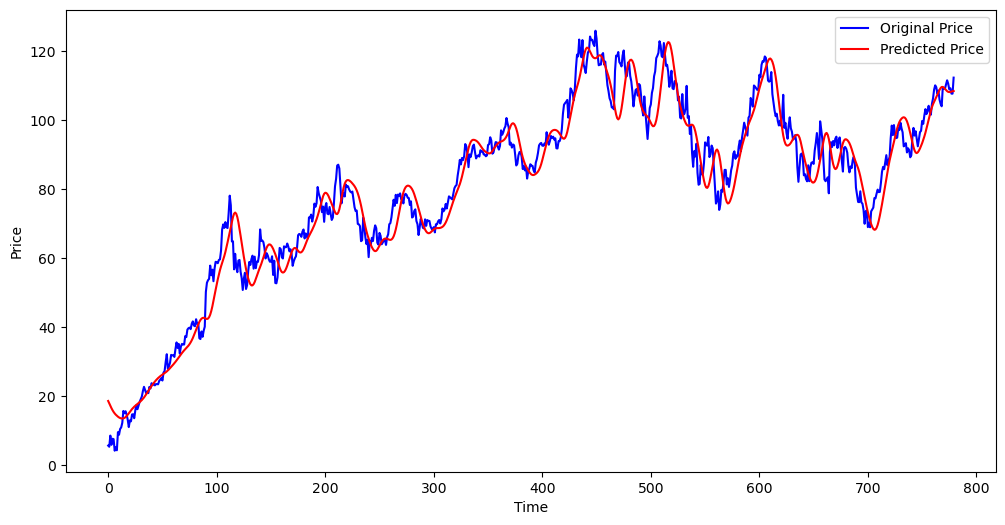

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()